In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
metadata = pd.read_csv("../metadata.csv", sep=";")
accessions = metadata[['Run']]["Run"].to_list()

In [44]:
result = pd.DataFrame()
count_bad = 0
count_ready = 0
count_bad_turin = 0
count_bad_ch = 0
for acc in accessions:
    try:
        df = pd.read_table(f"../kraken_taxonomy/data/{acc}/report.txt",names=["%", "total count", "self count", "taxonomy", "tax id", "name"], skipinitialspace=True)
        d_index = list(filter(lambda x: x > df.index[df['name'] == 'Bacteria'].to_list()[0], df.index[df['taxonomy'] == 'D']))
        if len(d_index) == 0:
            df = df.loc[::, ::]
        else:
            df = df.loc[:d_index[0] - 1, ::]
        df = df.loc[(df['taxonomy'] == "S")]
        df = df[["total count", "name"]].set_index("name").T
        df.insert(0, "Sample", str(acc))
        if df.shape[1] > 2000:
            result = pd.concat([result, df])
        else:
            count_bad += 1        
        count_ready += 1
    except:
        continue

In [42]:
count_ready

149

In [45]:
result = result.fillna(0)
result = result.set_index("Sample", drop=True)

In [38]:
result

name,Blautia wexlerae,Blautia obeum,Blautia sp. SC05B48,Blautia sp. NBRC 113351,Blautia sp. KLE_1732_HM_1032,Blautia hansenii,Blautia producta,Blautia pseudococcoides,Blautia argi,Blautia liquoris,...,Pseudomonas sp. LM8,Ochrobactrum sp. LM19,Wolbachia endosymbiont (group A) of Ancistrocerus nigricornis,Staphylococcus sp. IVB6227,Edwardsiella sp. LADL05-105,Coxiella endosymbiont of Amblyomma americanum,Dickeya sp. MK7,Bradyrhizobium sp. 184,Wolbachia endosymbiont (group A) of Anoplius nigerrimus,Shewanella sp. ALD9
Sample,,,,,,,,,,,,,,,,,,,,,
SRR15595350,77361,54234,12800,1658,24,3215,2768,2693,2225,846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR15595341,173113,45789,25915,1830,71,2578,2182,2042,2648,840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR15595330,459072,27590,31584,1948,71,2968,3308,2588,2935,1127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR15595315,117468,23476,49993,1736,11,1673,2588,2007,2118,1210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR15595313,462118,51701,140143,2860,54,3286,5235,2602,2664,1342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR22402265,30255,42726,16276,3600,14,2924,4439,3774,2949,2348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR22402263,136541,55895,22247,2544,26,9594,3818,3464,2890,2482,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
SRR22402262,369648,74094,285990,6541,123,6788,9158,8348,6385,3051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
metadata.loc[metadata["Run"].isin(result.index)]["BioProject"]

3      PRJNA757365
12     PRJNA757365
23     PRJNA757365
37     PRJNA757365
38     PRJNA757365
          ...     
156    PRJNA904924
157    PRJNA904924
159    PRJNA904924
160    PRJNA904924
161    PRJNA904924
Name: BioProject, Length: 112, dtype: object

<Axes: >

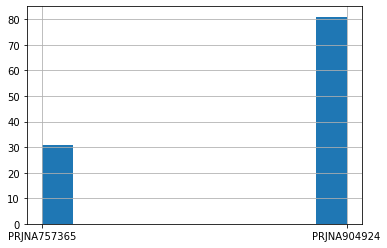

In [40]:
good = metadata.loc[metadata["Run"].isin(result.index)]["BioProject"]
good.hist()

In [46]:
result.to_csv("features.csv", sep=";")